       Exam1      Exam2  Admission
0  34.623660  78.024693          0
1  30.286711  43.894998          0
2  35.847409  72.902198          0
3  60.182599  86.308552          1
4  79.032736  75.344376          1


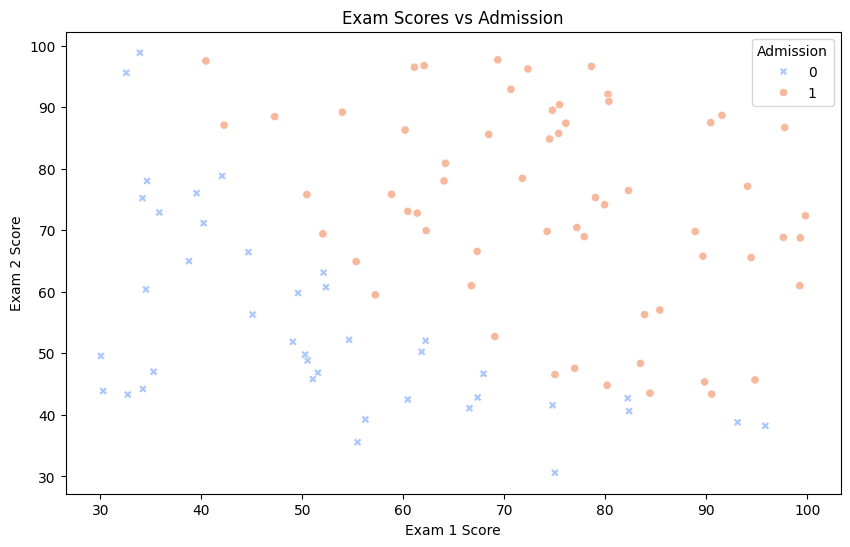

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

url = "https://raw.githubusercontent.com/kaleko/CourseraML/master/ex2/data/ex2data1.txt"
data = pd.read_csv(url, header=None, names=['Exam1', 'Exam2', 'Admission'])

print(data.head())

# Visualizing
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Exam1', y='Exam2', hue='Admission', palette='coolwarm', style='Admission', markers=["X", "o"])
plt.title('Exam Scores vs Admission')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(title='Admission')
plt.show()


In [2]:
X = data[['Exam1', 'Exam2']]
y = data['Admission'] #depends on x

# Split data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.2f}')


Accuracy Score: 0.83


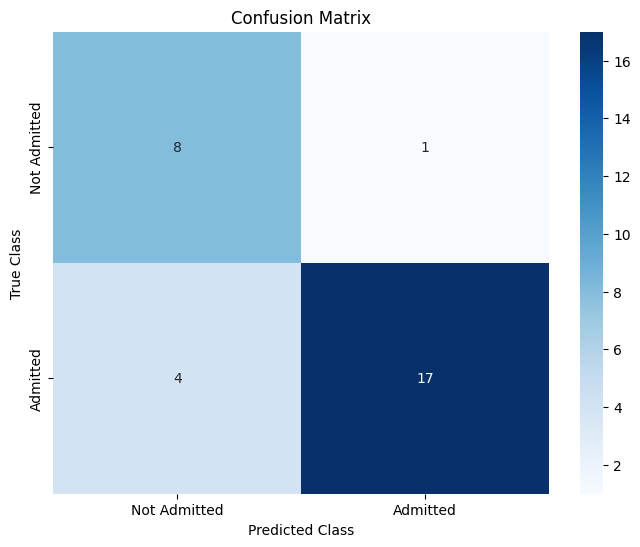

In [3]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Admitted', 'Admitted'], yticklabels=['Not Admitted', 'Admitted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


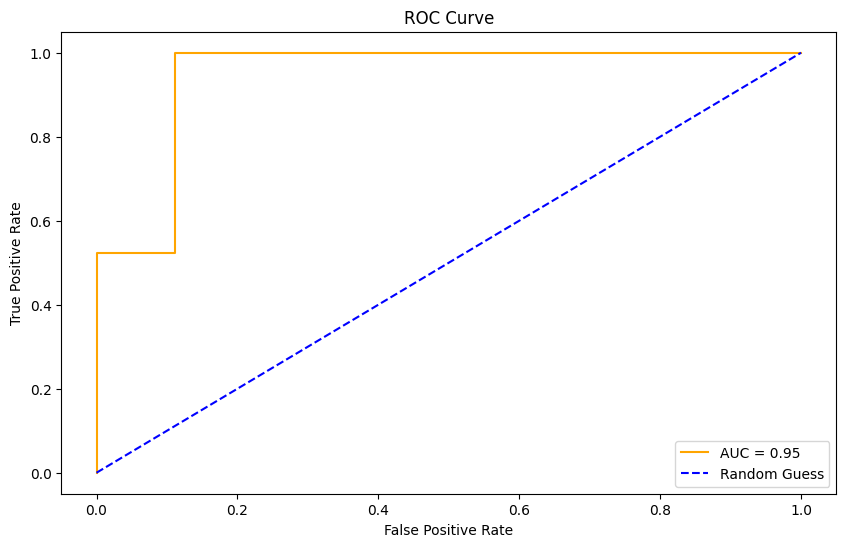

In [4]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = log_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [5]:
# Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.94      0.81      0.87        21

    accuracy                           0.83        30
   macro avg       0.81      0.85      0.82        30
weighted avg       0.86      0.83      0.84        30



The logistic regression model was applied to predict university admission based on students' exam scores. The model achieved an accuracy score of 0.83, meaning that 83% of the predictions were correct. However, accuracy alone is not always the best metric to evaluate the model, especially when the dataset could be imbalanced, as logistic regression is more focused on probability estimation rather than pure classification.


The confusion matrix shows that:

8 students were correctly predicted as not admitted (True Negative).
17 students were correctly predicted as admitted (True Positive).
1 student was incorrectly predicted as admitted but was not admitted (False Positive).
4 students were incorrectly predicted as not admitted but were actually admitted (False Negative).


The ROC Curve shows that the model performs better at lower false positive rates (FPR), where the curve stays close to the top left corner of the plot. However, when the false positive rate exceeds 0.2, the curve moves further away from the ideal diagonal line, indicating a decrease in performance. This suggests that the model is more reliable at identifying students who are not admitted, but it struggles with some cases of students who should be admitted.


Overall, the model provides a good balance between precision and recall but could still benefit from further optimization to improve its ability to correctly identify all admitted students.


